#Step 1: Reading and Understanding the Data


In [ ]:

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
leadInfo = pd.read_csv('Leads.csv')
leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
print(leadInfo.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
leadInfo.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
print(leadInfo.shape)


(9240, 37)


In [ ]:
print(leadInfo.isnull().any())



Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

# Step 2: Data Cleaning

In [ ]:
percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
percent_missing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [ ]:
duplicates = leadInfo.loc[leadInfo.duplicated(keep=False)]
duplicates

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values in the data.



In [ ]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

In [ ]:
leadInfo['Specialization'] = leadInfo['Specialization'].replace('Select', np.nan)
leadInfo['How did you hear about X Education'] = leadInfo['How did you hear about X Education'].replace('Select', np.nan)
leadInfo['Lead Profile'] = leadInfo['Lead Profile'].replace('Select', np.nan)
leadInfo['City'] = leadInfo['City'].replace('Select', np.nan)

In [ ]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
percent_missing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [ ]:
# Let us drop the following columns that have more than 30% null values

# a) Specialization
# b) How did you hear about X Education
# c) Tags
# d) Lead Quality
# e) Lead Profile
# f) City
# g) Asymmetrique Activity Index
# h) Asymmetrique Profile Index
# i) Asymmetrique Activity Score
# j) Asymmetrique Profile Score


leadInfo = leadInfo.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [ ]:
# check for percentage of null values in each column after dropping columns having more than 30% null values

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
percent_missing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [ ]:
# Lets check the value counts for each values in the country column

leadInfo.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [ ]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(leadInfo[leadInfo['Country'] == 'India'])/len(leadInfo['Country']),2)
country_percentage

70.26

In [ ]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values,
# we shall go ahead and drop the column
leadInfo = leadInfo.drop(['Country'], axis=1)

In [ ]:
leadInfo['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [ ]:
leadInfo['What is your current occupation'] = leadInfo['What is your current occupation'].replace(np.nan, 'No Information')

In [ ]:
leadInfo['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [ ]:
matters_most_percentage = round(100*len(leadInfo[leadInfo['What matters most to you in choosing a course']
                            == 'Better Career Prospects'])/len(leadInfo['What matters most to you in choosing a course']),2)
matters_most_percentage

70.65

In [ ]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

leadInfo = leadInfo.drop(['What matters most to you in choosing a course'], axis=1)

In [ ]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
percent_missing

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

Outlier Treatment


In [ ]:
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

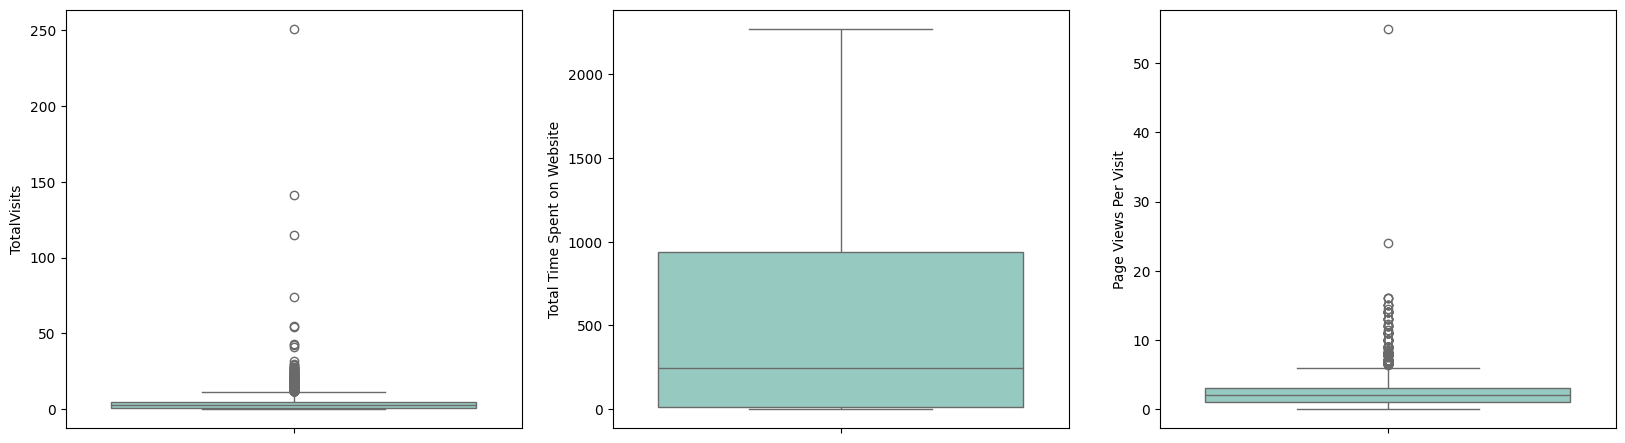

In [ ]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leadInfo)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leadInfo)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leadInfo)
plt.show()

In [ ]:
nn_quartile_total_visits = leadInfo['TotalVisits'].quantile(0.99)
leadInfo = leadInfo[leadInfo["TotalVisits"] < nn_quartile_total_visits]
leadInfo["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9004.000000
mean        3.182474
std         2.935631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000
mean,617071.677032,0.380164,3.182474,479.631941,2.334519
std,23344.559061,0.485454,2.935631,544.845091,2.061779
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596424.750000,0.000000,1.000000,6.000000,1.000000
50%,615427.000000,0.000000,3.000000,242.000000,2.000000
75%,637183.250000,1.000000,5.000000,915.250000,3.000000
90%,650276.800000,1.000000,7.000000,1371.000000,5.000000
95%,655341.400000,1.000000,9.000000,1554.850000,6.000000
99%,659561.790000,1.000000,13.000000,1836.940000,9.000000


In [ ]:
nn_quartile_page_visits = leadInfo['Page Views Per Visit'].quantile(0.99)
leadInfo = leadInfo[leadInfo["Page Views Per Visit"] < nn_quartile_page_visits]
leadInfo["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8892.000000
mean        2.229871
std         1.837171
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [ ]:
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000
mean,617059.278677,0.379780,3.088507,476.563878,2.229871
std,23301.503938,0.485359,2.822722,544.325819,1.837171
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596446.750000,0.000000,1.000000,3.750000,1.000000
50%,615467.000000,0.000000,3.000000,239.000000,2.000000
75%,637131.750000,1.000000,4.000000,908.250000,3.000000
90%,650163.800000,1.000000,7.000000,1370.000000,5.000000
95%,655264.500000,1.000000,8.000000,1553.000000,6.000000
99%,659555.630000,1.000000,13.000000,1837.180000,7.000000


In [ ]:
num_data = round(100*(len(leadInfo)/9240),2)
num_data

96.23

# Step 3: Data Analysis

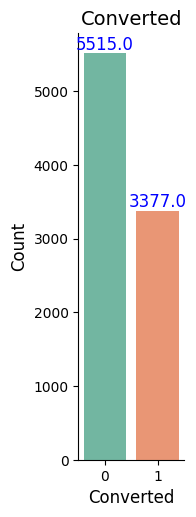

In [ ]:
# Conversion Rate

plot = sns.catplot(x="Converted", kind="count", data=leadInfo, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


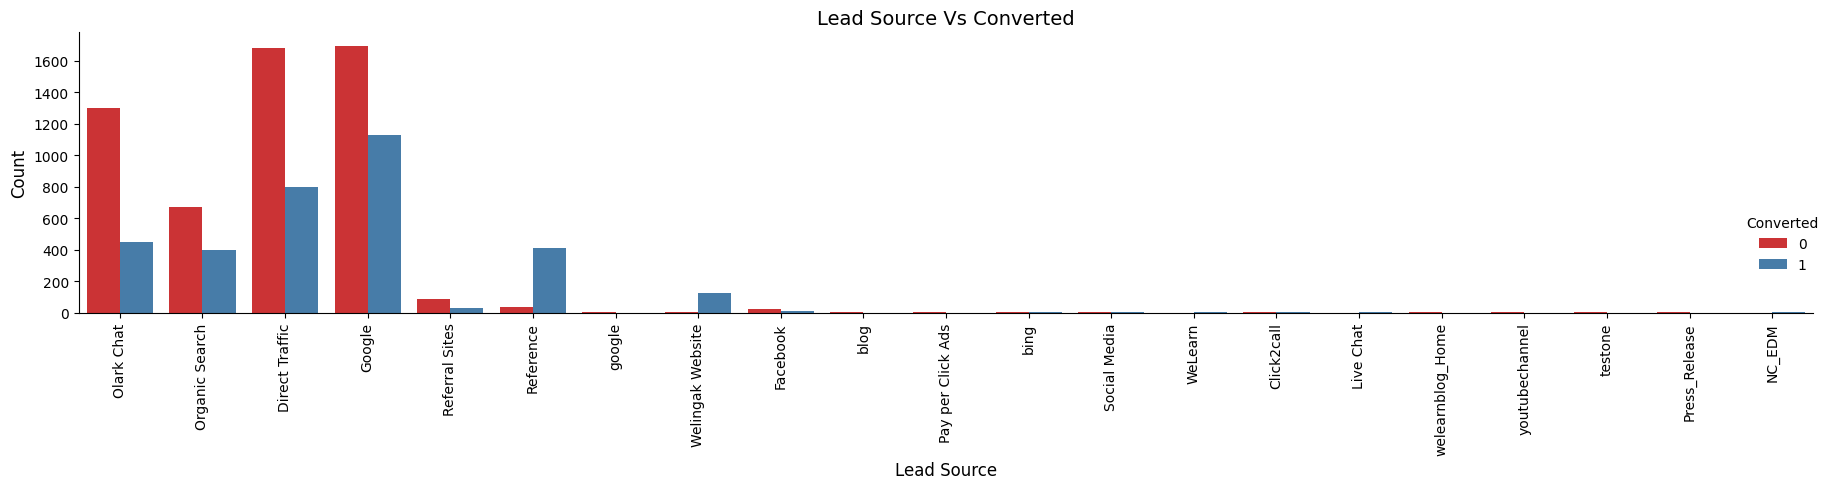

In [ ]:
plot = sns.catplot(x="Lead Source", hue="Converted", kind="count", data=leadInfo, palette="Set1", aspect=3.5)

# Add titles and labels
plt.title('Lead Source Vs Converted', fontsize=14)
plt.xlabel("Lead Source", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Observation: Most of the conversions was happened through Google.


Text(36.79885779774874, 0.5, 'Count')

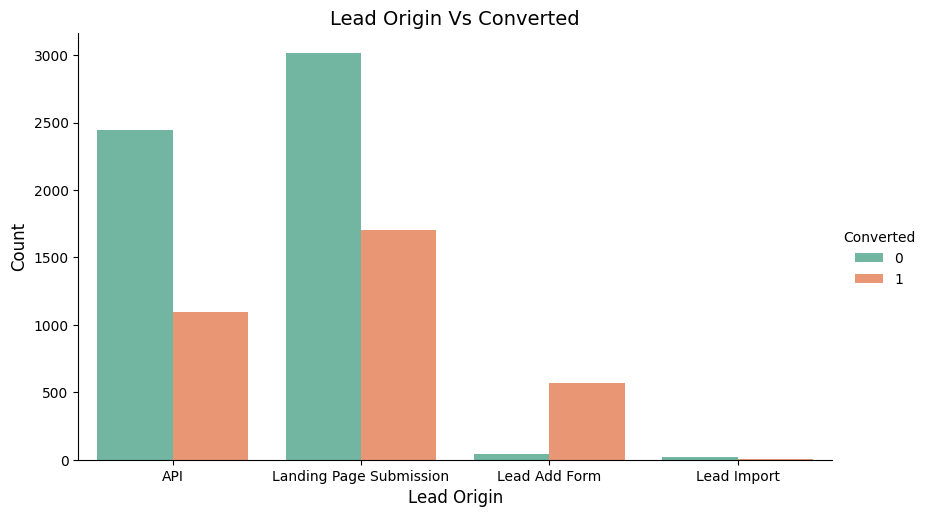

In [ ]:
plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


Observation: Maximum conversions happened through landing page submission

Text(51.096763760288056, 0.5, 'Count')

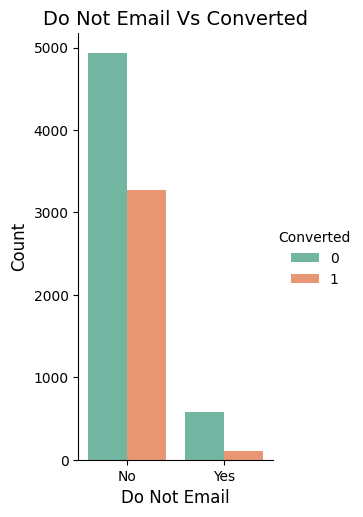

In [ ]:
plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


Text(51.096763760288056, 0.5, 'Count')

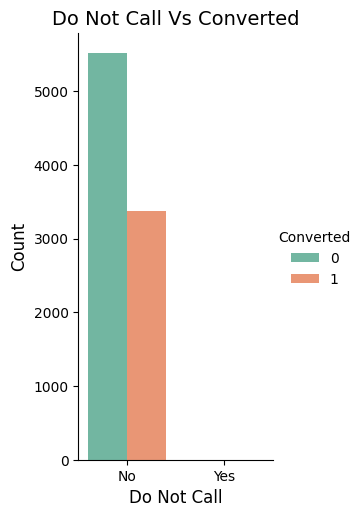

In [ ]:
plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

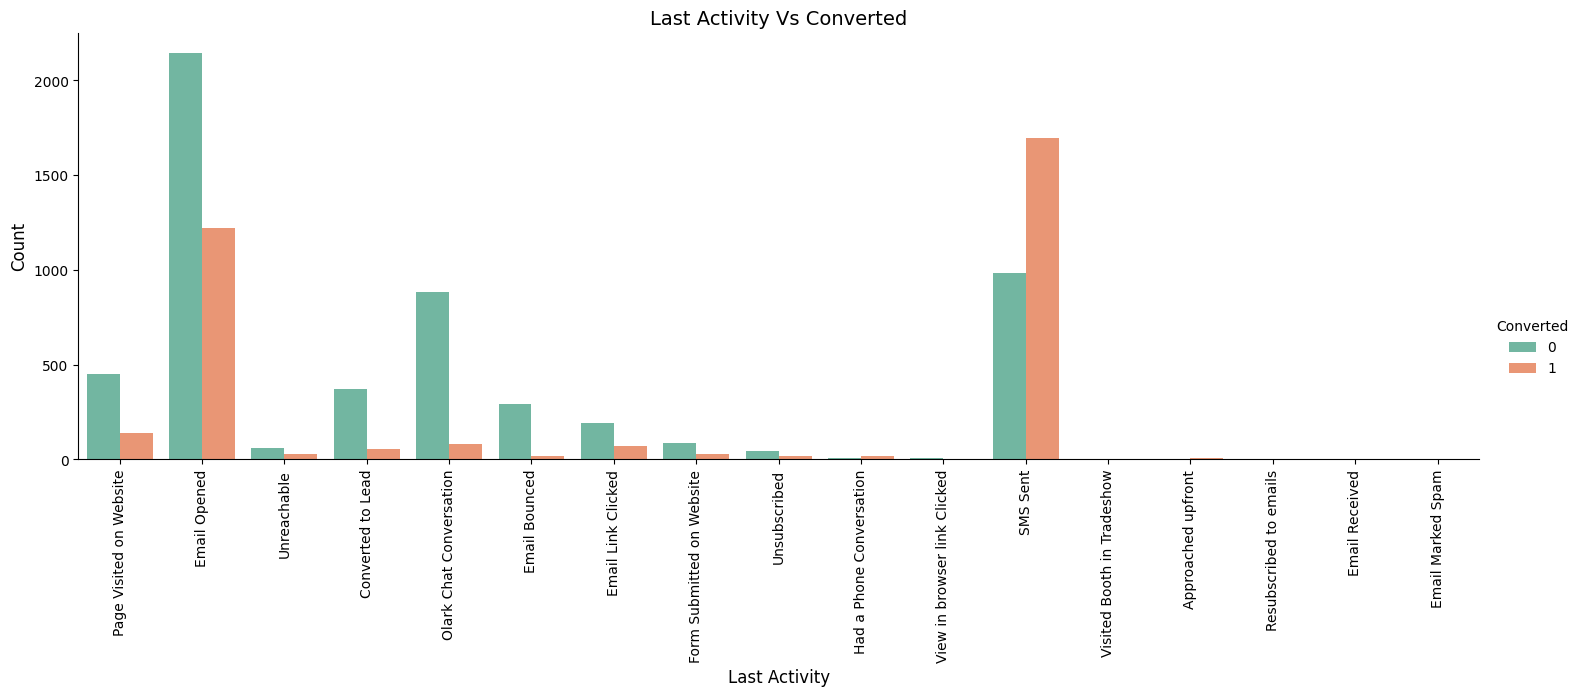

In [ ]:
plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)


Observation: Most of the conversions happened through SMS sent last activity.


Text(35.629029128086415, 0.5, 'Count')

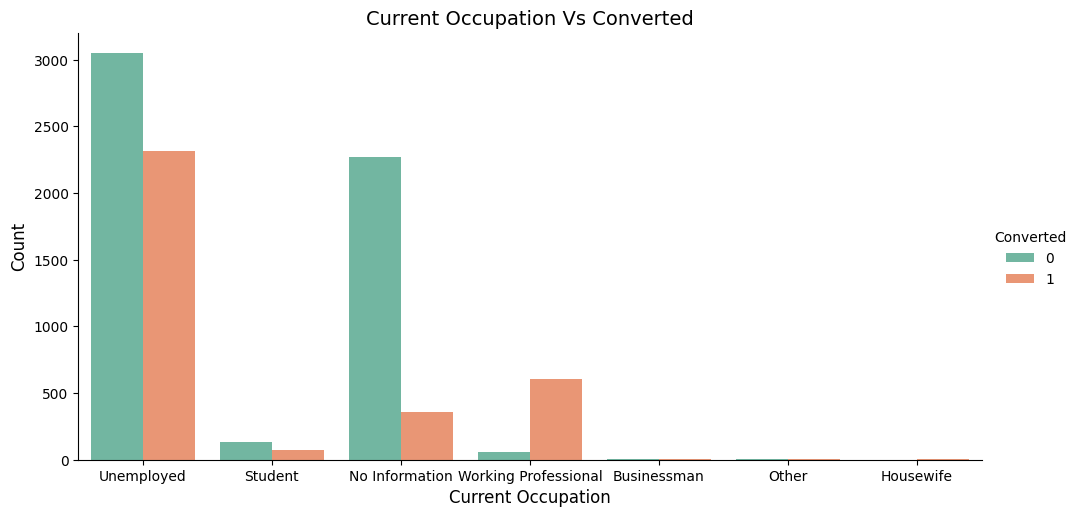

In [ ]:
plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leadInfo, palette="Set2",
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


Text(47.940083223104054, 0.5, 'Count')

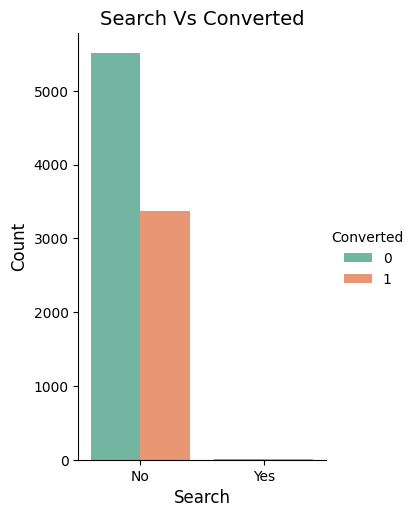

In [ ]:
plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


Text(55.51611651234566, 0.5, 'Count')

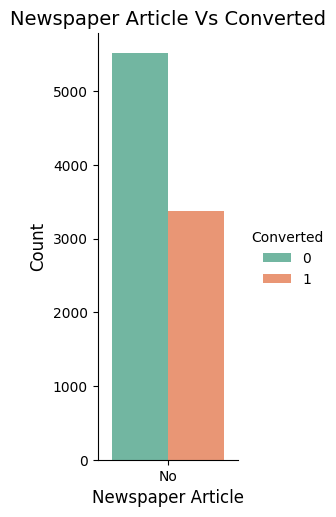

In [ ]:
plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)



plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

In [ ]:
leadInfo = leadInfo.drop(['X Education Forums'], axis=1)

Text(47.940083223104054, 0.5, 'Count')

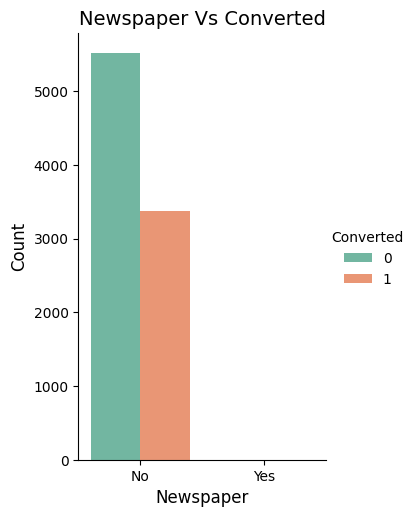

In [ ]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


In [ ]:
leadInfo = leadInfo.drop(['Newspaper'], axis=1)

Text(47.940083223104054, 0.5, 'Count')

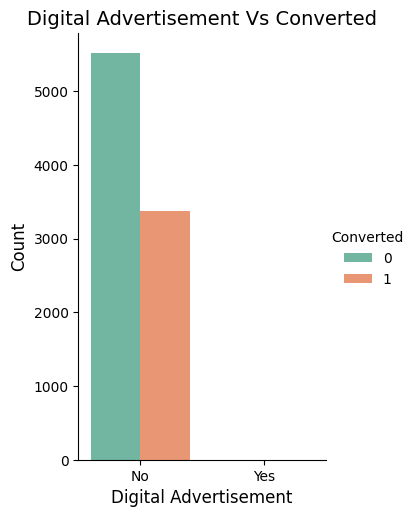

In [ ]:
plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


Text(47.940083223104054, 0.5, 'Count')

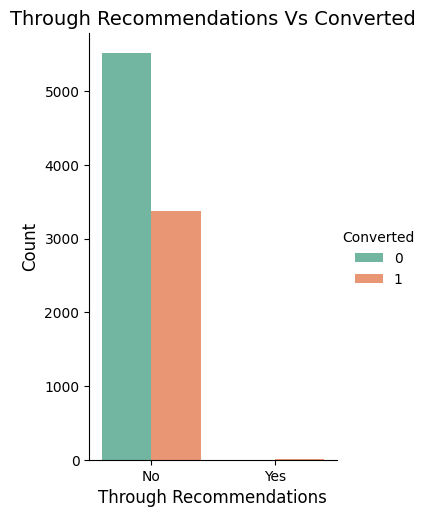

In [ ]:
plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

Text(47.940083223104054, 0.5, 'Count')

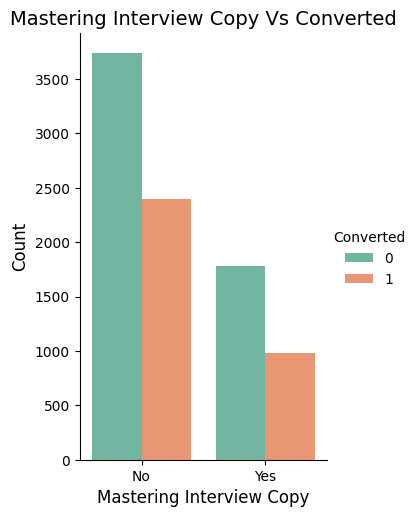

In [ ]:
plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leadInfo, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

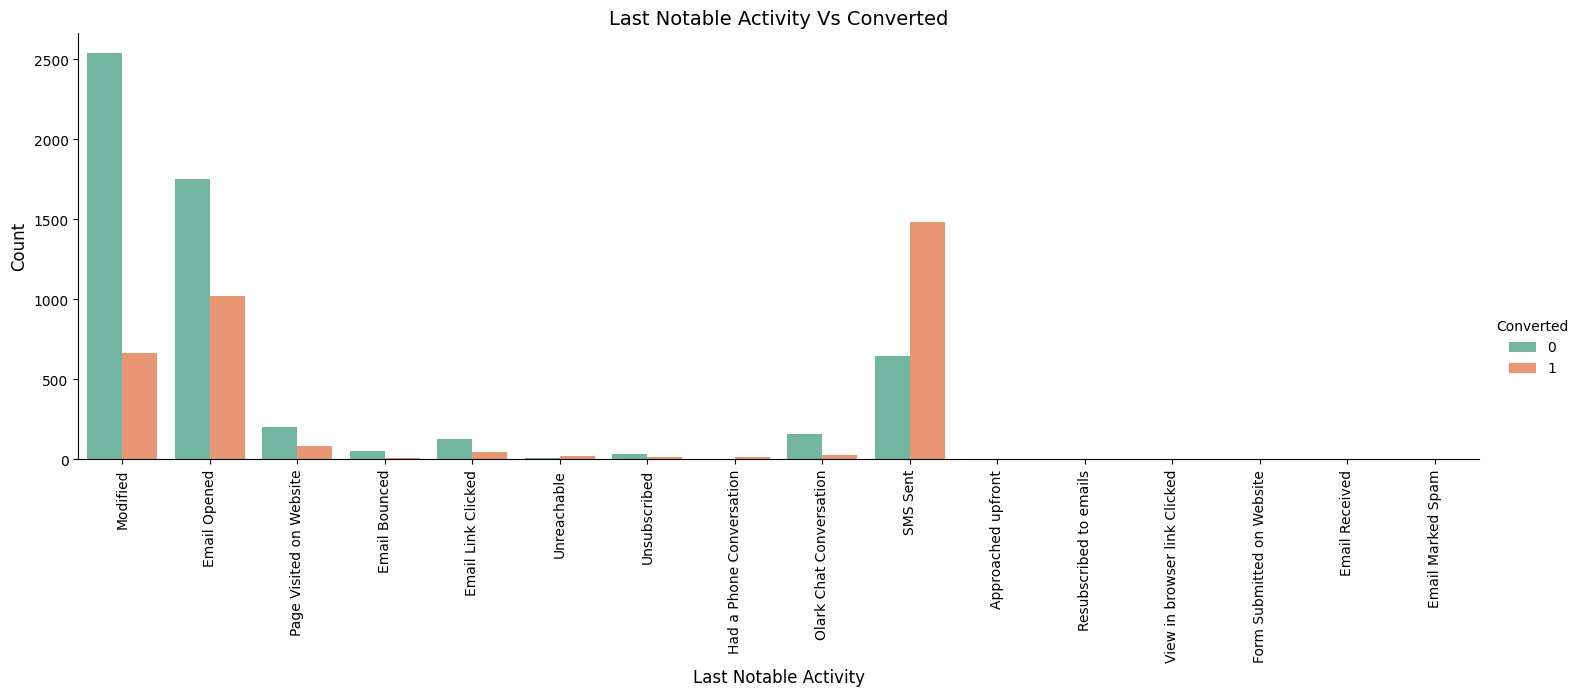

In [ ]:

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)


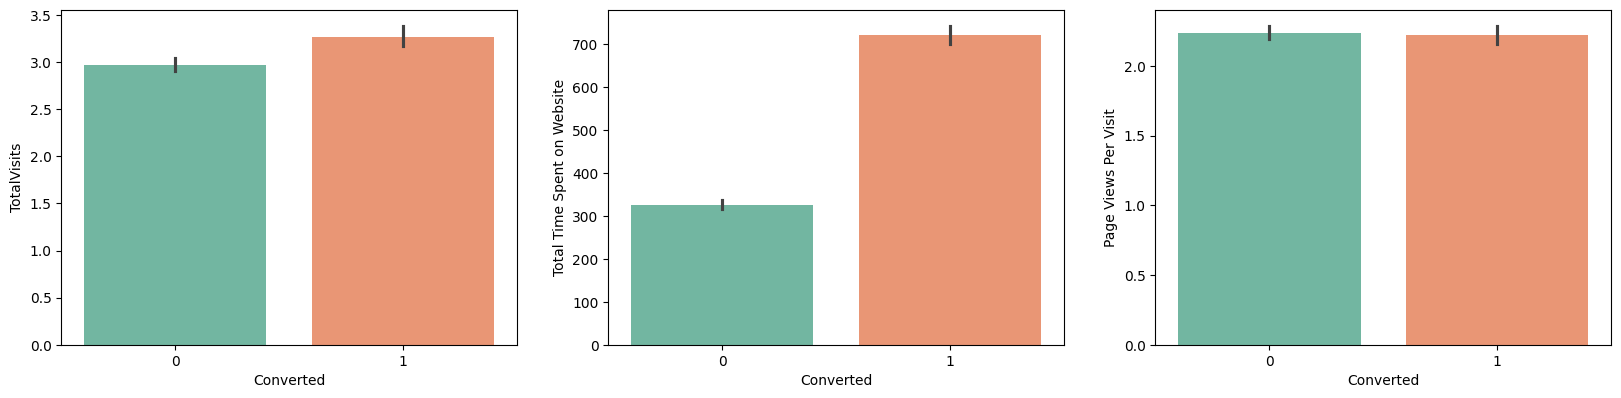

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadInfo)
plt.show()

#  Step 4: Data Preparation - Creating Dummies

In [ ]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations',
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leadInfo[variablelist] = leadInfo[variablelist].apply(binary_map)

In [ ]:
leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Magazine,Newspaper Article,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,No,No,0,0,No,No,No,No,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,No,No,0,0,No,No,No,No,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,No,No,0,0,No,No,No,No,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,No,No,0,0,No,No,No,No,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,No,No,0,0,No,No,No,No,0,Modified


In [ ]:
leadInfo = leadInfo[leadInfo['Lead Origin'] != 'Quick Add Form']

# One-hot encode 'Lead Origin'
d_lead_origin = pd.get_dummies(leadInfo['Lead Origin'], prefix='LeadOrigin')

# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, d_lead_origin], axis=1)

# Optionally, you can drop the original 'Lead Origin' column if no longer needed
leadInfo = leadInfo.drop(columns=['Lead Origin'])

leadInfo = leadInfo[leadInfo['Lead Source'] != 'NC_EDM']

# One-hot encode 'Lead Source'
d_lead_source = pd.get_dummies(leadInfo['Lead Source'], prefix='LeadSource')

# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, d_lead_source], axis=1)

# Optionally, you can drop the original 'Lead Source' column if no longer needed
leadInfo = leadInfo.drop(columns=['Lead Source'])

# last Activity

leadInfo = leadInfo[leadInfo['Last Activity'] != 'Resubscribed to emails']

# One-hot encode 'Last Activity'
d_last_activity = pd.get_dummies(leadInfo['Last Activity'], prefix='LastActivity')

# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, d_last_activity], axis=1)

# Optionally, you can drop the original 'Last Activity' column if no longer needed
leadInfo = leadInfo.drop(columns=['Last Activity'])

# What is your current occupation

leadInfo = leadInfo[leadInfo['What is your current occupation'] != 'Businessman']

# One-hot encode 'What is your current occupation'
d_curr_occupation = pd.get_dummies(leadInfo['What is your current occupation'], prefix='CurrentOccupation')

# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, d_curr_occupation], axis=1)

# Optionally, you can drop the original 'What is your current occupation' column if no longer needed
leadInfo = leadInfo.drop(columns=['What is your current occupation'])

# Last Notable Activity

leadInfo = leadInfo[leadInfo['Last Notable Activity'] != 'Resubscribed to emails']

# One-hot encode 'Last Notable Activity'
d_last_notable_activity = pd.get_dummies(leadInfo['Last Notable Activity'], prefix='LastNotableActivity')

# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, d_last_notable_activity], axis=1)

# Optionally, you can drop the original 'Last Notable Activity' column if no longer needed
leadInfo = leadInfo.drop(columns=['Last Notable Activity'])
leadInfo.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,No,...,False,False,False,True,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,No,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,No,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,No,...,False,False,False,True,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,No,...,False,False,False,True,False,False,False,False,False,False


In [ ]:

leadInfo = leadInfo.drop(['Prospect ID', 'Lead Number'], axis=1)

In [ ]:
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8883 entries, 0 to 9239
Data columns (total 77 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      8883 non-null   int64  
 1   Do Not Call                                       8883 non-null   int64  
 2   Converted                                         8883 non-null   int64  
 3   TotalVisits                                       8883 non-null   float64
 4   Total Time Spent on Website                       8883 non-null   int64  
 5   Page Views Per Visit                              8883 non-null   float64
 6   Search                                            8883 non-null   int64  
 7   Magazine                                          8883 non-null   object 
 8   Newspaper Article                                 8883 non-null   object 
 9   Digital Advertisement   

In [ ]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 77, dtype: float64


# Step 5: Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = leadInfo.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,Digital Advertisement,Through Recommendations,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,No,No,0,0,...,False,False,False,True,False,False,False,False,False,False
1,0,0,5.0,674,2.5,0,No,No,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,0,No,No,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,0,No,No,0,0,...,False,False,False,True,False,False,False,False,False,False
4,0,0,2.0,1428,1.0,0,No,No,0,0,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
y = leadInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# Step 6: Rescaling the features using Min-Max


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,Digital Advertisement,Through Recommendations,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
3419,0,0,0.1250,0.002641,0.2500,0,No,No,0,0,...,False,False,False,False,False,False,False,False,False,False
3276,0,0,0.2500,0.041813,0.5000,0,No,No,0,0,...,False,False,False,False,True,False,False,False,False,False
7063,0,0,0.2500,0.504842,0.5000,0,No,No,0,0,...,False,False,False,False,False,False,True,False,False,False
5750,0,0,0.1875,0.133363,0.3750,0,No,No,0,0,...,False,False,False,False,False,False,False,False,False,False
3599,0,0,0.1875,0.035211,0.1875,0,No,No,0,0,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
### Checking the Conversion Rate percentage

converted = (sum(leadInfo['Converted'])/len(leadInfo['Converted'].index))*100
converted

37.9488911403805

We have almost 38% conversion rate


# Step 7: Model Building


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)  # `drop_first=True` to avoid multicollinearity
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
X_train_lm = sm.add_constant(X_train)

# Fit the Generalized Linear Model (GLM) with a Binomial family
logm1 = sm.GLM(y_train, X_train_lm.astype(float), family=sm.families.Binomial()).fit()

# Print the summary of the GLM model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6157
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 23 Jul 2024   Deviance:                   1.4073e+05
Time:                        15:38:30   Pearson chi2:                 6.88e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

###Step 8: Feature Selection Using RFE


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Search', False, 8),
 ('Digital Advertisement', False, 46),
 ('Through Recommendations', False, 14),
 ('A free copy of Mastering The Interview', False, 36),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 37),
 ('LeadSource_Click2call', False, 45),
 ('LeadSource_Direct Traffic', False, 20),
 ('LeadSource_Facebook', False, 23),
 ('LeadSource_Google', False, 22),
 ('LeadSource_Live Chat', False, 39),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 21),
 ('LeadSource_Pay per Click Ads', False, 30),
 ('LeadSource_Press_Release', False, 47),
 ('LeadSource_Reference', False, 12),
 ('LeadSource_Referral Sites', False, 19),
 ('LeadSource_Social Media', False, 9),
 ('LeadSource_WeLearn', False, 48),


In [ ]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'CurrentOccupation_Housewife',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')

# Rebuilding Model 2


In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6197
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2533.0
Date:                Tue, 23 Jul 2024   Deviance:                       5066.1
Time:                        15:38:38   Pearson chi2:                 6.01e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4037
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.6338      0.580      1.093      0.274      -0.502       1.770
Do Not Email                                   -1.3105      0.197     -6.647      0.000      -1.697      -0.924
TotalVisits                                     1.2348      0.255      4.838      0.000       0.735       1.735
Total Time Spent on Website                     4.4006      0.171     25.701      0.000       4.065       4.736
LeadOrigin_API                                 -1.2570      0.586     -2.146      0.032      -2.405      -0.109
LeadOrigin_Landing Page Submission             -1.6250      0.584     -2.785      0.005      -2.769      -0.481
LeadOrigin_Lead Add Form                        2.5410      0.615      4.132      0.000       1.336       3.746
LeadSource_Olark Chat                           1.3433      0.134     10.031      0.000       1.081       1.606
LeadSource_Welingak Website                     2.4741      1.035      2.390      0.017       0.445       4.503
LastActivity_Approached upfront                22.5691    1.9e+04      0.001      0.999   -3.72e+04    3.72e+04
LastActivity_Email Bounced                     -1.4056      0.418     -3.366      0.001      -2.224      -0.587
LastActivity_Had a Phone Conversation           1.3636      0.625      2.183      0.029       0.139       2.588
LastActivity_Olark Chat Conversation           -1.1314      0.187     -6.038      0.000      -1.499      -0.764
CurrentOccupation_Housewife                    22.0719   1.96e+04      0.001      0.999   -3.85e+04    3.85e+04
CurrentOccupation_No Information               -1.1312      0.089    -12.716      0.000      -1.306      -0.957
CurrentOccupation_Working Professional          2.5337      0.190     13.303      0.000       2.160       2.907
LastNotableActivity_Email Link Clicked         -1.6768      0.261     -6.422      0.000      -2.189      -1.165
LastNotableActivity_Email Opened               -1.3651      0.090    -15.156      0.000      -1.542      -1.189
LastNotableActivity_Modified                   -1.6199      0.098    -16.535      0.000      -1.812      -1.428
LastNotableActivity_Olark Chat Conversation    -1.4776      0.366     -4.042      0.000      -2.194      -0.761
LastNotableActivity_Page Visited on Website    -1.9961      0.232     -8.598      0.000      -2.451      -1.541
===============================================================================================================
"""

In [ ]:
col = col.drop('LastActivity_Approached upfront',1)

###Rebuilding Model 3


In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6198
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.7
Date:                Tue, 23 Jul 2024   Deviance:                       5073.3
Time:                        15:38:38   Pearson chi2:                 6.02e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4030
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.6321      0.580      1.091      0.275      -0.504       1.768
Do Not Email                                   -1.3128      0.197     -6.660      0.000      -1.699      -0.927
TotalVisits                                     1.2360      0.255      4.843      0.000       0.736       1.736
Total Time Spent on Website                     4.4069      0.171     25.745      0.000       4.071       4.742
LeadOrigin_API                                 -1.2587      0.586     -2.150      0.032      -2.406      -0.111
LeadOrigin_Landing Page Submission             -1.6248      0.583     -2.785      0.005      -2.768      -0.481
LeadOrigin_Lead Add Form                        2.5391      0.615      4.130      0.000       1.334       3.744
LeadSource_Olark Chat                           1.3565      0.134     10.137      0.000       1.094       1.619
LeadSource_Welingak Website                     2.4736      1.035      2.390      0.017       0.445       4.502
LastActivity_Email Bounced                     -1.4103      0.417     -3.379      0.001      -2.228      -0.592
LastActivity_Had a Phone Conversation           1.3585      0.625      2.175      0.030       0.134       2.583
LastActivity_Olark Chat Conversation           -1.1470      0.187     -6.127      0.000      -1.514      -0.780
CurrentOccupation_Housewife                    21.0642   1.19e+04      0.002      0.999   -2.33e+04    2.34e+04
CurrentOccupation_No Information               -1.1368      0.089    -12.783      0.000      -1.311      -0.962
CurrentOccupation_Working Professional          2.5300      0.190     13.285      0.000       2.157       2.903
LastNotableActivity_Email Link Clicked         -1.6786      0.261     -6.429      0.000      -2.190      -1.167
LastNotableActivity_Email Opened               -1.3661      0.090    -15.164      0.000      -1.543      -1.190
LastNotableActivity_Modified                   -1.6085      0.098    -16.455      0.000      -1.800      -1.417
LastNotableActivity_Olark Chat Conversation    -1.4657      0.365     -4.010      0.000      -2.182      -0.749
LastNotableActivity_Page Visited on Website    -1.9964      0.232     -8.597      0.000      -2.452      -1.541
===============================================================================================================
"""

In [ ]:
# Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

col = col.drop('CurrentOccupation_Housewife',1)

###Rebuilding Model 4

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6199
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.9
Date:                Tue, 23 Jul 2024   Deviance:                       5077.7
Time:                        15:38:38   Pearson chi2:                 6.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.6306      0.579      1.088      0.276      -0.505       1.766
Do Not Email                                   -1.3148      0.197     -6.668      0.000      -1.701      -0.928
TotalVisits                                     1.2347      0.255      4.838      0.000       0.735       1.735
Total Time Spent on Website                     4.4121      0.171     25.785      0.000       4.077       4.747
LeadOrigin_API                                 -1.2581      0.585     -2.149      0.032      -2.406      -0.111
LeadOrigin_Landing Page Submission             -1.6234      0.583     -2.783      0.005      -2.767      -0.480
LeadOrigin_Lead Add Form                        2.5539      0.615      4.155      0.000       1.349       3.759
LeadSource_Olark Chat                           1.3566      0.134     10.138      0.000       1.094       1.619
LeadSource_Welingak Website                     2.4585      1.035      2.375      0.018       0.430       4.487
LastActivity_Email Bounced                     -1.4103      0.417     -3.380      0.001      -2.228      -0.592
LastActivity_Had a Phone Conversation           1.3565      0.625      2.172      0.030       0.133       2.581
LastActivity_Olark Chat Conversation           -1.1498      0.187     -6.141      0.000      -1.517      -0.783
CurrentOccupation_No Information               -1.1391      0.089    -12.810      0.000      -1.313      -0.965
CurrentOccupation_Working Professional          2.5273      0.190     13.270      0.000       2.154       2.901
LastNotableActivity_Email Link Clicked         -1.6672      0.260     -6.423      0.000      -2.176      -1.159
LastNotableActivity_Email Opened               -1.3646      0.090    -15.149      0.000      -1.541      -1.188
LastNotableActivity_Modified                   -1.6047      0.098    -16.424      0.000      -1.796      -1.413
LastNotableActivity_Olark Chat Conversation    -1.4623      0.366     -4.000      0.000      -2.179      -0.746
LastNotableActivity_Page Visited on Website    -1.9966      0.232     -8.595      0.000      -2.452      -1.541
===============================================================================================================
"""

In [ ]:
#Removing column LastActivity_Had a Phone Conversation as it has high pvalue and hence is insignificant


col = col.drop('LastActivity_Had a Phone Conversation',1)

###Rebuilding Model - Model 5


In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6200
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.5
Date:                Tue, 23 Jul 2024   Deviance:                       5082.9
Time:                        15:38:39   Pearson chi2:                 6.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.6353      0.579      1.096      0.273      -0.500       1.771
Do Not Email                                   -1.3195      0.197     -6.688      0.000      -1.706      -0.933
TotalVisits                                     1.2562      0.254      4.938      0.000       0.758       1.755
Total Time Spent on Website                     4.4071      0.171     25.786      0.000       4.072       4.742
LeadOrigin_API                                 -1.2542      0.585     -2.142      0.032      -2.402      -0.107
LeadOrigin_Landing Page Submission             -1.6239      0.583     -2.784      0.005      -2.767      -0.481
LeadOrigin_Lead Add Form                        2.5519      0.615      4.152      0.000       1.347       3.757
LeadSource_Olark Chat                           1.3523      0.134     10.112      0.000       1.090       1.614
LeadSource_Welingak Website                     2.4582      1.035      2.375      0.018       0.430       4.487
LastActivity_Email Bounced                     -1.4137      0.417     -3.388      0.001      -2.232      -0.596
LastActivity_Olark Chat Conversation           -1.1596      0.187     -6.197      0.000      -1.526      -0.793
CurrentOccupation_No Information               -1.1401      0.089    -12.826      0.000      -1.314      -0.966
CurrentOccupation_Working Professional          2.5289      0.190     13.288      0.000       2.156       2.902
LastNotableActivity_Email Link Clicked         -1.6748      0.260     -6.453      0.000      -2.183      -1.166
LastNotableActivity_Email Opened               -1.3730      0.090    -15.253      0.000      -1.549      -1.197
LastNotableActivity_Modified                   -1.6017      0.098    -16.414      0.000      -1.793      -1.410
LastNotableActivity_Olark Chat Conversation    -1.4604      0.366     -3.994      0.000      -2.177      -0.744
LastNotableActivity_Page Visited on Website    -2.0084      0.232     -8.647      0.000      -2.464      -1.553
===============================================================================================================
"""

In [ ]:
#Removing column LeadOrigin_API as it has high pvalue and hence is insignificant


col = col.drop('LeadOrigin_API',1)

###Rebuilding Model 6


In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6201
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.5
Date:                Tue, 23 Jul 2024   Deviance:                       5087.0
Time:                        15:38:39   Pearson chi2:                 6.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4017
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.5863      0.120     -4.874      0.000      -0.822      -0.351
Do Not Email                                   -1.3205      0.197     -6.697      0.000      -1.707      -0.934
TotalVisits                                     1.2110      0.253      4.783      0.000       0.715       1.707
Total Time Spent on Website                     4.3828      0.170     25.744      0.000       4.049       4.716
LeadOrigin_Landing Page Submission             -0.3860      0.090     -4.275      0.000      -0.563      -0.209
LeadOrigin_Lead Add Form                        3.7698      0.243     15.513      0.000       3.294       4.246
LeadSource_Olark Chat                           1.3186      0.132      9.954      0.000       1.059       1.578
LeadSource_Welingak Website                     2.4596      1.035      2.376      0.017       0.431       4.488
LastActivity_Email Bounced                     -1.4163      0.417     -3.395      0.001      -2.234      -0.599
LastActivity_Olark Chat Conversation           -1.1629      0.187     -6.217      0.000      -1.530      -0.796
CurrentOccupation_No Information               -1.1425      0.089    -12.864      0.000      -1.317      -0.968
CurrentOccupation_Working Professional          2.5387      0.190     13.336      0.000       2.166       2.912
LastNotableActivity_Email Link Clicked         -1.6729      0.259     -6.448      0.000      -2.181      -1.164
LastNotableActivity_Email Opened               -1.3653      0.090    -15.193      0.000      -1.541      -1.189
LastNotableActivity_Modified                   -1.5998      0.098    -16.404      0.000      -1.791      -1.409
LastNotableActivity_Olark Chat Conversation    -1.4535      0.365     -3.979      0.000      -2.169      -0.737
LastNotableActivity_Page Visited on Website    -1.9996      0.232     -8.623      0.000      -2.454      -1.545
===============================================================================================================
"""

In [ ]:
#Removing column LeadSource_Welingak Website as it has high pvalue and hence is insignificant

col = col.drop('LeadSource_Welingak Website',1)

###Rebuilding Model 7


In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6202
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.3
Date:                Tue, 23 Jul 2024   Deviance:                       5098.6
Time:                        15:38:39   Pearson chi2:                 6.20e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.5866      0.120     -4.879      0.000      -0.822      -0.351
Do Not Email                                   -1.3064      0.196     -6.675      0.000      -1.690      -0.923
TotalVisits                                     1.2135      0.253      4.795      0.000       0.717       1.710
Total Time Spent on Website                     4.3812      0.170     25.745      0.000       4.048       4.715
LeadOrigin_Landing Page Submission             -0.3859      0.090     -4.276      0.000      -0.563      -0.209
LeadOrigin_Lead Add Form                        4.1008      0.236     17.345      0.000       3.637       4.564
LeadSource_Olark Chat                           1.3185      0.132      9.955      0.000       1.059       1.578
LastActivity_Email Bounced                     -1.3915      0.409     -3.405      0.001      -2.192      -0.590
LastActivity_Olark Chat Conversation           -1.1657      0.187     -6.230      0.000      -1.532      -0.799
CurrentOccupation_No Information               -1.1428      0.089    -12.869      0.000      -1.317      -0.969
CurrentOccupation_Working Professional          2.5266      0.191     13.257      0.000       2.153       2.900
LastNotableActivity_Email Link Clicked         -1.6795      0.260     -6.456      0.000      -2.189      -1.170
LastNotableActivity_Email Opened               -1.3668      0.090    -15.215      0.000      -1.543      -1.191
LastNotableActivity_Modified                   -1.5983      0.097    -16.418      0.000      -1.789      -1.408
LastNotableActivity_Olark Chat Conversation    -1.4298      0.362     -3.949      0.000      -2.139      -0.720
LastNotableActivity_Page Visited on Website    -2.0029      0.232     -8.630      0.000      -2.458      -1.548
===============================================================================================================
"""

Since the Model 7 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis



In [ ]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

3419    0.034931
3276    0.043880
7063    0.598656
5750    0.242036
3599    0.048853
9199    0.115864
5472    0.006168
2722    0.959815
9121    0.465196
330     0.031451
dtype: float64

In [ ]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03493096, 0.0438799 , 0.59865557, 0.24203576, 0.04885304,
       0.11586366, 0.00616799, 0.95981462, 0.46519558, 0.03145137])

In [ ]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.034931,3419
1,0,0.043880,3276
2,1,0.598656,7063
3,0,0.242036,5750
4,0,0.048853,3599


In [ ]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.034931,3419,0
1,0,0.043880,3276,0
2,1,0.598656,7063,1
3,0,0.242036,5750,0
4,0,0.048853,3599,0


Lets check the confusion metrics and accuracy


In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3387  445]
 [ 742 1644]]


In [ ]:
# Predicted     not_converted    converted
# Actual
# not_converted        3387      445
# converted            742       1644

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8091026053393374


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

Checking VIFs


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values.astype(float), i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.05
3,LeadOrigin_Landing Page Submission,2.83
12,LastNotableActivity_Modified,2.33
2,Total Time Spent on Website,2.02
7,LastActivity_Olark Chat Conversation,1.98
11,LastNotableActivity_Email Opened,1.92
0,Do Not Email,1.83
5,LeadSource_Olark Chat,1.78
6,LastActivity_Email Bounced,1.77
8,CurrentOccupation_No Information,1.61


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
TP / float(TP+FN) # Let's see the sensitivity of our logistic regression model


0.6890192791282481

In [ ]:
TN / float(TN+FP) # Let us calculate specificity


0.8838726513569938

In [ ]:
print(FP/ float(TN+FP)) # Calculate false postive rate - predicting non conversion when leads have converted


0.11612734864300626


In [ ]:
print (TP / float(TP+FP)) # positive predictive value


0.7869794159885113


In [ ]:
print (TN / float(TN+ FN))  # Negative predictive value


0.8202954710583676


#Step 9: Plotting the ROC Curve


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,drop_intermediate = False )

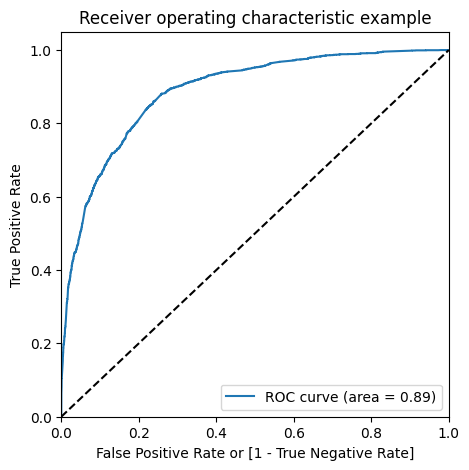

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#Step 10: Finding Optimal Cutoff Point


Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.034931,3419,0,1,0,0,0,0,0,0,0,0,0
1,0,0.043880,3276,0,1,0,0,0,0,0,0,0,0,0
2,1,0.598656,7063,1,1,1,1,1,1,1,0,0,0,0
3,0,0.242036,5750,0,1,1,1,0,0,0,0,0,0,0
4,0,0.048853,3599,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383725  1.000000  0.000000
0.1   0.1  0.596977  0.979044  0.359081
0.2   0.2  0.761981  0.913244  0.667797
0.3   0.3  0.798167  0.860436  0.759395
0.4   0.4  0.805564  0.758173  0.835073
0.5   0.5  0.809103  0.689019  0.883873
0.6   0.6  0.803474  0.619028  0.918319
0.7   0.7  0.779672  0.507544  0.949113
0.8   0.8  0.762464  0.430847  0.968946
0.9   0.9  0.708266  0.258592  0.988257


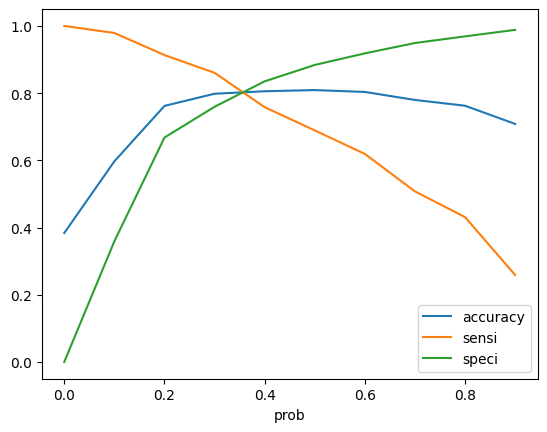

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.37 is the optimum point to take it as a cutoff probability.


In [ ]:
# Let us make the final prediction using 0.37 as the cut off


y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.034931,3419,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.043880,3276,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.598656,7063,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.242036,5750,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.048853,3599,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.034931,3419,0,1,0,0,0,0,0,0,0,0,0,0,3
1,0,0.043880,3276,0,1,0,0,0,0,0,0,0,0,0,0,4
2,1,0.598656,7063,1,1,1,1,1,1,1,0,0,0,0,1,60
3,0,0.242036,5750,0,1,1,1,0,0,0,0,0,0,0,0,24
4,0,0.048853,3599,0,1,0,0,0,0,0,0,0,0,0,0,5
5,0,0.115864,9199,0,1,1,0,0,0,0,0,0,0,0,0,12
6,0,0.006168,5472,0,1,0,0,0,0,0,0,0,0,0,0,1
7,1,0.959815,2722,1,1,1,1,1,1,1,1,1,1,1,1,96
8,0,0.465196,9121,0,1,1,1,1,1,0,0,0,0,0,1,47
9,0,0.031451,330,0,1,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

final_predicted
1    1883
0     503
Name: count, dtype: int64

In [ ]:
# check the precentage of final_predicted conversions

1883/float(1883+503)

0.78918692372171

In [ ]:
# Hence we can see that the final prediction of conversions have a target of 79% (78.92%) conversion as per the X Educations CEO's requirement . Hence this is a good model.
# Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [ ]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) # Let's check the overall accuracy.


0.8065294306851077

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3132,  700],
       [ 503, 1883]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
TP / float(TP+FN) # Let's see the sensitivity of our logistic regression model


0.78918692372171

In [ ]:
TN / float(TN+FP) # Let us calculate specificity


0.8173277661795407

In [ ]:
print(FP/ float(TN+FP)) # Calculate false postive rate - predicting conversions when leads has not converted


0.1826722338204593


In [ ]:
# Positive predictive value

print (TP / float(TP+FP))

0.7289972899728997


In [ ]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8616231086657496


Metrics - Precision and Recall


In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3387,  445],
       [ 742, 1644]])

In [ ]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7869794159885113

In [ ]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6890192791282481

##Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6213    1
 6214    1
 6215    0
 6216    0
 6217    0
 Name: Converted, Length: 6218, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6213    1
 6214    1
 6215    0
 6216    0
 6217    0
 Name: predicted, Length: 6218, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

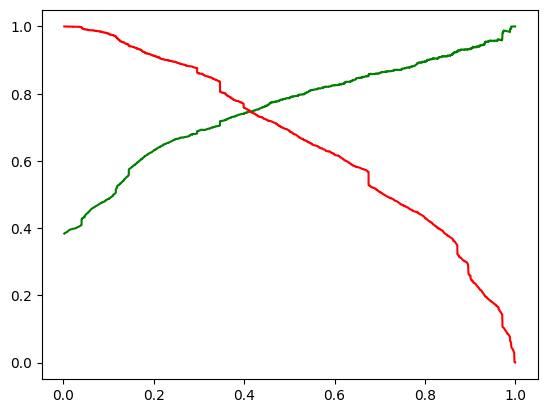

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#Step 11: Making predictions on the test set


In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [ ]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LastActivity_Email Bounced,LastActivity_Olark Chat Conversation,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website
4511,0,0.5000,0.124560,True,False,False,False,False,True,False,False,False,False,False,True
684,1,0.2500,0.369278,False,False,False,False,False,True,False,False,False,False,False,False
3637,0,0.1875,0.160651,True,False,False,False,False,False,False,False,True,False,False,False
2648,0,0.1875,0.011444,True,False,False,False,False,False,False,False,False,True,False,False
3363,0,0.1250,0.119278,True,False,False,False,False,True,False,False,True,False,False,False


In [ ]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set



In [ ]:
y_test_pred = res.predict(X_test_sm.astype(float))

In [ ]:
y_test_pred[:10]

4511    0.048996
684     0.247022
3637    0.196572
2648    0.091695
3363    0.056903
8537    0.730547
4949    0.878659
2273    0.871678
1702    0.046762
2031    0.649127
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head

y_pred_1.head()

,0
4511,0.048996
684,0.247022
3637,0.196572
2648,0.091695
3363,0.056903


In [ ]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index


In [ ]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Converted,LeadId,0
0,0,4511,0.048996
1,0,684,0.247022
2,0,3637,0.196572
3,0,2648,0.091695
4,0,3363,0.056903


In [ ]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'}) # Renaming the column


In [ ]:
y_pred_final = y_pred_final.reindex(['LeadId', 'Converted', 'Converted_Prob'], axis=1) # Rearranging the columns


In [ ]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,4511,0,0.048996
1,684,0,0.247022
2,3637,0,0.196572
3,2648,0,0.091695
4,3363,0,0.056903


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0) # Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%


In [ ]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,4511,0,0.048996,0
1,684,0,0.247022,0
2,3637,0,0.196572,0
3,2648,0,0.091695,0
4,3363,0,0.056903,0


In [ ]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,4511,0,0.048996,0,5
1,684,0,0.247022,0,25
2,3637,0,0.196572,0,20
3,2648,0,0.091695,0,9
4,3363,0,0.056903,0,6
5,8537,0,0.730547,1,73
6,4949,1,0.878659,1,88
7,2273,1,0.871678,1,87
8,1702,0,0.046762,0,5
9,2031,1,0.649127,1,65


In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

final_predicted
1    817
0    168
Name: count, dtype: int64

In [ ]:
817/float(817+168)  # check the precentage of final_predicted conversions on test data

0.8294416243654822

In [ ]:
#Hence we can see that the final prediction of conversions have a target rate of 82.9 approx 83%

In [ ]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted) # Let's check the accuracy.

0.8288930581613508

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1392,  288],
       [ 168,  817]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8294416243654822

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8285714285714286

In [ ]:
from sklearn.metrics import precision_score, recall_score

###Precision and Recall metrics for the test set


In [ ]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7393665158371041
recall  0.8294416243654822


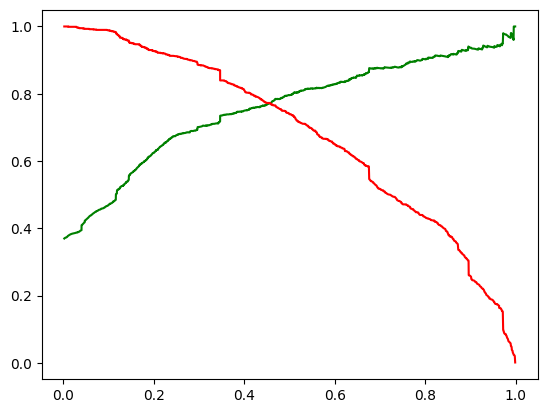

In [ ]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 83% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is
  around 83%
- Hence overall this model seems to be good.   

